In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [3]:
df = pd.read_csv("xAPI-Edu-Data.csv")

In [4]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [6]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [7]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [8]:
df.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [9]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [13]:
df['gender'] = df['gender'].replace({'M': 0, 'F': 1})

In [11]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [14]:
df['ParentschoolSatisfaction'] = df['ParentschoolSatisfaction'].replace({'Bad': 0, 'Good': 1})

In [16]:
df['StudentAbsenceDays'] = df['StudentAbsenceDays'].replace({'Above-7': 0, 'Under-7': 1})

In [17]:
unique_characters = pd.Series(list(''.join(df['Semester'].unique()))).unique()

print(unique_characters)

['F' 'S']


In [19]:
df['Class'] = df['Class'].replace({'M': 0, 'L': 1, 'H' : 2})

In [20]:
df.dtypes

gender                       int64
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction     int64
StudentAbsenceDays           int64
Class                        int64
dtype: object

In [49]:
df['ParentAnsweringSurvey'] = df['ParentAnsweringSurvey'].replace({'No': 0, 'Yes': 1})

In [50]:
df['Relation'] = df['Relation'].replace({'Father': 0, 'Mum': 1})

In [51]:
df['Topic'] = pd.factorize(df['Topic'])[0]

In [54]:
df['Semester'] = df['Semester'].replace({'F': 0, 'S': 1})

In [57]:
df['SectionID'] = pd.factorize(df['Topic'])[0]

In [58]:
df['GradeID'] = pd.factorize(df['Topic'])[0]

In [59]:
df['StageID'] = pd.factorize(df['StageID'])[0]

In [61]:
df['PlaceofBirth'] = pd.factorize(df['PlaceofBirth'])[0]

In [62]:
df['NationalITy'] = pd.factorize(df['NationalITy'])[0]

In [64]:
df['gender'] = pd.factorize(df['gender'])[0]

In [66]:
df['raisedhands'] = (df['raisedhands'] - df['raisedhands'].min()) / (df['raisedhands'].max() - df['raisedhands'].min())

In [76]:
df['StageID'] = (df['StageID'] - df['StageID'].min()) / (df['StageID'].max() - df['StageID'].min())

In [77]:
df['GradeID'] = (df['GradeID'] - df['GradeID'].min()) / (df['GradeID'].max() - df['GradeID'].min())

In [78]:
df['SectionID'] = (df['SectionID'] - df['SectionID'].min()) / (df['SectionID'].max() - df['SectionID'].min())

In [79]:
df['Topic'] = (df['Topic'] - df['Topic'].min()) / (df['Topic'].max() - df['Topic'].min())

In [81]:
df['Relation'] = (df['Relation'] - df['Relation'].min()) / (df['Relation'].max() - df['Relation'].min())

In [80]:
df['Semester'] = (df['Semester'] - df['Semester'].min()) / (df['Semester'].max() - df['Semester'].min())

In [73]:
df['NationalITy'] = (df['NationalITy'] - df['NationalITy'].min()) / (df['NationalITy'].max() - df['NationalITy'].min())

In [74]:
df['PlaceofBirth'] = (df['PlaceofBirth'] - df['PlaceofBirth'].min()) / (df['PlaceofBirth'].max() - df['PlaceofBirth'].min())

In [71]:
df['Discussion'] = (df['Discussion'] - df['Discussion'].min()) / (df['Discussion'].max() - df['Discussion'].min())

In [70]:
df['AnnouncementsView'] = (df['AnnouncementsView'] - df['AnnouncementsView'].min()) / (df['AnnouncementsView'].max() - df['AnnouncementsView'].min())

In [68]:
df['VisITedResources'] = (df['VisITedResources'] - df['VisITedResources'].min()) / (df['VisITedResources'].max() - df['VisITedResources'].min())

In [82]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.161616,0.020408,0.193878,1,1,1,0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20,0.202020,0.030612,0.244898,1,1,1,0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.070707,0.000000,0.295918,0,0,0,1
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.30,0.252525,0.051020,0.346939,0,0,0,1
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.40,0.505051,0.122449,0.500000,0,0,0,0


In [83]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.15,0.161616,0.020408,0.193878,1,1,1,0
1,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.20,0.202020,0.030612,0.244898,1,1,1,0
2,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.10,0.070707,0.000000,0.295918,0,0,0,1
3,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.30,0.252525,0.051020,0.346939,0,0,0,1
4,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.40,0.505051,0.122449,0.500000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,0.384615,0.384615,0.5,0.909091,0.909091,0.909091,1.0,0.0,0.05,0.040404,0.051020,0.071429,0,0,0,1
476,1,0.384615,0.384615,0.5,1.000000,1.000000,1.000000,0.0,0.0,0.50,0.777778,0.142857,0.275510,0,0,1,0
477,1,0.384615,0.384615,0.5,1.000000,1.000000,1.000000,1.0,0.0,0.55,0.747475,0.255102,0.285714,0,0,1,0
478,1,0.384615,0.384615,0.5,0.727273,0.727273,0.727273,0.0,0.0,0.30,0.171717,0.142857,0.571429,0,0,0,1


In [84]:
df.to_csv('AS2B108.csv', index=False)

<Axes: ylabel='raisedhands'>

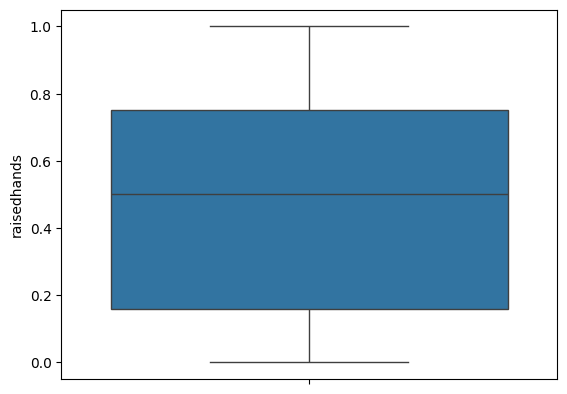

In [90]:
sns.boxplot(df['raisedhands'])

<Axes: >

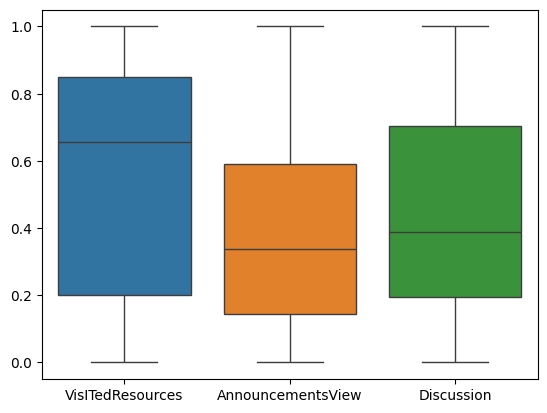

In [94]:
sns.boxplot(data=df[['VisITedResources', 'AnnouncementsView','Discussion']])

<Axes: xlabel='VisITedResources', ylabel='Discussion'>

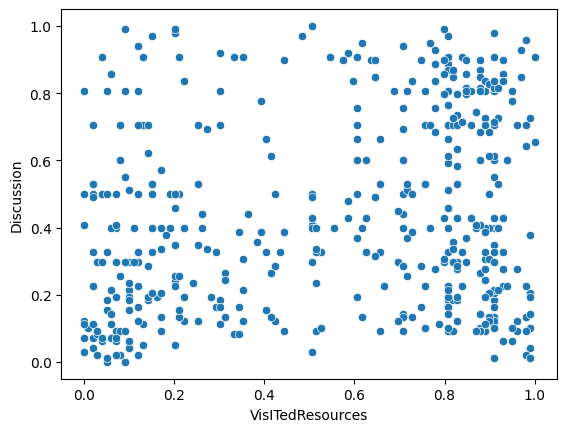

In [95]:
sns.scatterplot(x='VisITedResources', y='Discussion', data=df)

In [96]:
Q1 = df['raisedhands'].quantile(0.25)
Q3 = df['raisedhands'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR for 'raisedhands' column: {IQR}")

IQR for 'raisedhands' column: 0.5925


In [97]:
Q1_VisITedResources = df['VisITedResources'].quantile(0.25)
Q3_VisITedResources = df['VisITedResources'].quantile(0.75)
IQR_VisITedResources = Q3_VisITedResources - Q1_VisITedResources
print(f"IQR for 'VisITedResources' column: {IQR_VisITedResources}")

IQR for 'VisITedResources' column: 0.6464646464646465
